In [177]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Midterm Project: Victimization - Aidan Long
### A) The Dataset

Data File Below:

In [170]:
crime = pd.read_csv(r"C:\Users\aidan\Downloads\NCVS_2020.csv")
crime

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,4,1,9,9,26,1,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,2020.4,1.998940e+24,3,47,3,5,1,9,2,2,...,1,1,9,9,23,1,3,2,4,3
8039,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8040,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8041,2020.4,1.998950e+24,7,57,1,1,1,9,2,2,...,1,1,9,9,4,3,1,1,4,1


In [139]:
crime.columns.values

array(['YEARQ', 'IDHH', 'ICPSR', 'PANEL_ROT_GROUP', 'URBANICITY',
       'LIV_TYPE', 'UNITS', 'OUTSIDE', 'GATED', 'RESTRICTED', 'INCOME',
       'RACE_HOH', 'PRINCIPAL_REL', 'PRINCIPAL_AGE', 'PRINCIPAL_MARITAL',
       'PRINCIPAL_SEX', 'PRINCIPAL_ARMFOR', 'PRINCIPAL_ED',
       'PRINCIPAL_RACE', 'PRINCIPAL_HISP', 'REF_AGE', 'REF_MARITAL',
       'REF_SEX', 'REF_ARMFOR', 'REF_ED', 'REF_RACE', 'REF_HISP',
       'NUM_OVER12', 'NUM_UNDER12', 'NUM_REPORT', 'BUSINESS',
       'BUSINESS_SIGN', 'BROKEN_IN', 'NUM_BROKEN_IN', 'NUM_VEHICLE',
       'VEHICLE_THEFT', 'NUM_VEHICLE_THEFT', 'COLLEGE', 'PUBLIC',
       'INDIAN_RES', 'FAMILY_STRUCTURE', 'REGION', 'PRINCIPAL_SCHOOL',
       'REF_SCHOOL', 'REF_REL', 'AGE', 'MARITAL', 'SEX', 'ARMFOR', 'ED',
       'RACE', 'HISP', 'STOLEN', 'NUM_STOLEN', 'ATTACK_LOC', 'WEAPON',
       'NUM_WEAPON', 'OFFENDER_KNOWN', 'NUM_OFFENDER_KNOWN', 'FORCED_SEX',
       'NUM_FORCED_SEX', 'POLICE', 'NO_POLICE', 'DIS_HEAR', 'DIS_VIS',
       'DIS_LEARN', 'DIS_PHYS', 'DI

### B) Characteristics of Sample

In [140]:
# Figure 1 (Employee Type 1)
from tabulate import tabulate 
values = {
    1: 'Private Company',
    2: 'Federal Government Employee',
    3: 'State, County, or Local Government',
    4: 'Self-Employed',
    8: 'Residue',
    9: 'Out of Universe',
}
crime['EMP_TYPE'] = crime['EMP_TYPE'].replace(values)
emp_type_df = pd.DataFrame(crime['EMP_TYPE'].value_counts()).reset_index()
emp_type_df.columns = ['Employment Type', 'Victim Count']
emp_type_table = tabulate(emp_type_df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(emp_type_table)

╒════════════════════════════════════╤════════════════╕
│ Employment Type                    │   Victim Count │
╞════════════════════════════════════╪════════════════╡
│ Private Company                    │           3808 │
├────────────────────────────────────┼────────────────┤
│ Out of Universe                    │           2617 │
├────────────────────────────────────┼────────────────┤
│ State, County, or Local Government │            681 │
├────────────────────────────────────┼────────────────┤
│ Self-Employed                      │            673 │
├────────────────────────────────────┼────────────────┤
│ Federal Government Employee        │            191 │
├────────────────────────────────────┼────────────────┤
│ Residue                            │             73 │
╘════════════════════════════════════╧════════════════╛


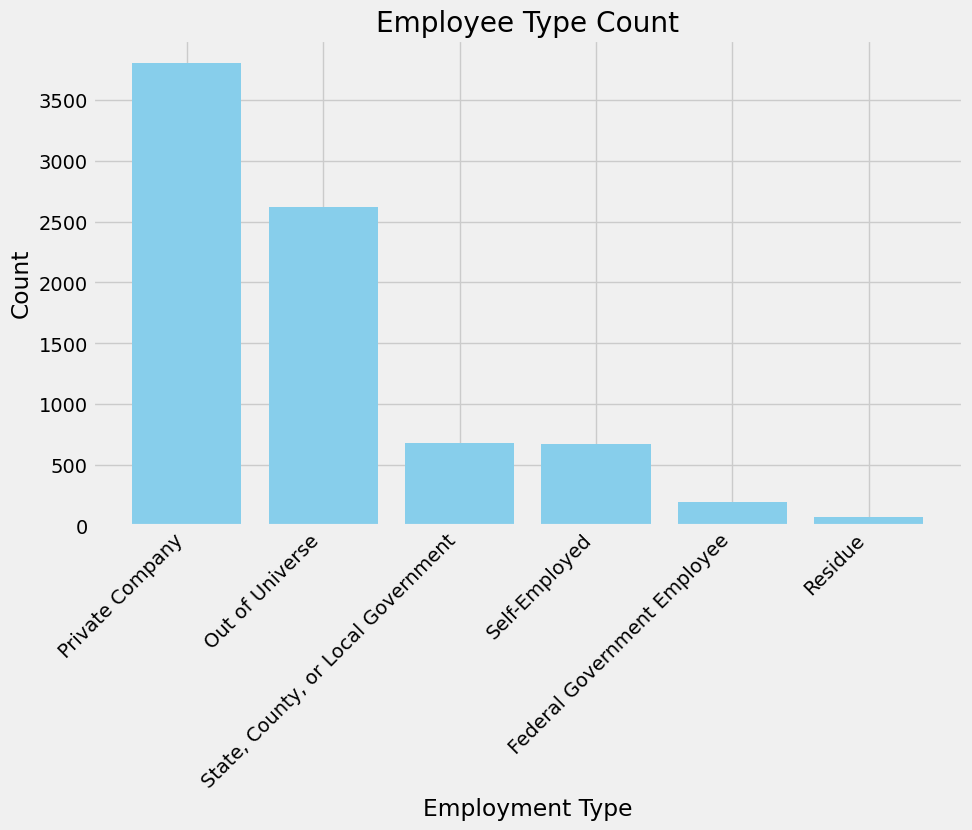

In [166]:
# Figure x (Employee Type 2)
plt.figure(figsize=(10, 6))
plt.bar(emp_type_df['Employment Type'], emp_type_df['Victim Count'], color='skyblue')
plt.title('Employee Type Count')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

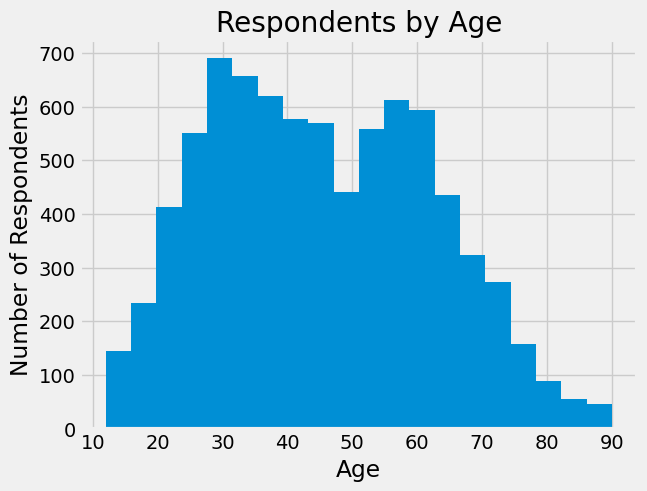

In [167]:
# Figure 2 (Age)
crime.hist('AGE', bins = 20)
plt.ylabel('Number of Respondents')
plt.xlabel('Age')
plt.title('Respondents by Age')
plt.show()

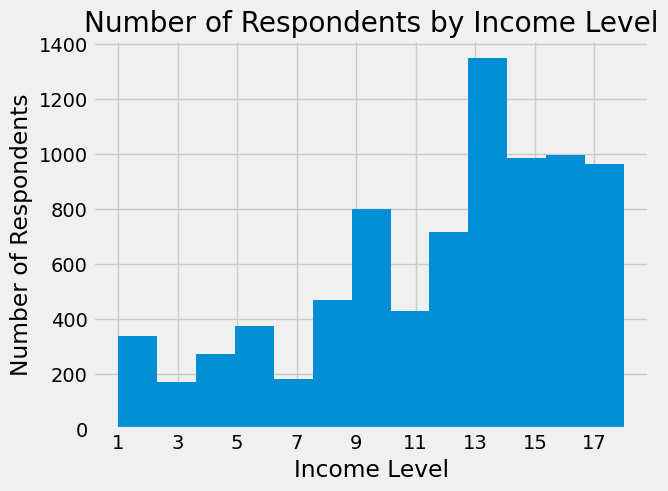

In [171]:
# Figure 3 (Income Level 1)
crime.hist('INCOME', bins = 13)
plt.xticks([1,3,5,7,9,11,13,15,17])
plt.ylabel('Number of Respondents')
plt.xlabel('Income Level')
plt.title('Number of Respondents by Income Level')
plt.show()

In [172]:
# Figure 4 (Income Level 2)
income_values = [
    ('01', 'Less than $5,000'),
    ('02', '$5,000 to $7,499'),
    ('03', '$7,500 to $9,999'),
    ('04', '$10,000 to $12,499'),
    ('05', '$12,500 to $14,999'),
    ('06', '$15,000 to $17,499'),
    ('07', '$17,500 to $19,999'),
    ('08', '$20,000 to $24,999'),
    ('09', '$25,000 to $29,999'),
    ('10', '$30,000 to $34,999'),
    ('11', '$35,000 to $39,999'),
    ('12', '$40,000 to $49,999'),
    ('13', '$50,000 to $74,999'),
    ('15', '$75,000 to $99,999'),
    ('16', '$100,000-$149,999'),
    ('17', '$150,000-$199,999'),
    ('18', '$200,000 or more'),
    ('98', 'Residue'),
    ('99', 'Out of universe'),
]

income_values_df = pd.DataFrame(income_values, columns=['Index Number', 'Income Range'])
income_table = tabulate(income_values_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(income_table)

╒════════════════╤════════════════════╕
│   Index Number │ Income Range       │
╞════════════════╪════════════════════╡
│             01 │ Less than $5,000   │
├────────────────┼────────────────────┤
│             02 │ $5,000 to $7,499   │
├────────────────┼────────────────────┤
│             03 │ $7,500 to $9,999   │
├────────────────┼────────────────────┤
│             04 │ $10,000 to $12,499 │
├────────────────┼────────────────────┤
│             05 │ $12,500 to $14,999 │
├────────────────┼────────────────────┤
│             06 │ $15,000 to $17,499 │
├────────────────┼────────────────────┤
│             07 │ $17,500 to $19,999 │
├────────────────┼────────────────────┤
│             08 │ $20,000 to $24,999 │
├────────────────┼────────────────────┤
│             09 │ $25,000 to $29,999 │
├────────────────┼────────────────────┤
│             10 │ $30,000 to $34,999 │
├────────────────┼────────────────────┤
│             11 │ $35,000 to $39,999 │
├────────────────┼────────────────────┤


### C) Relationship Between Variables

In [163]:
# Seeing if there is a relationship between race and forced sex 
race = crime['RACE'].value_counts()
filtered_forced_sex = crime[(crime['NUM_FORCED_SEX'] != 999) & (crime['NUM_FORCED_SEX'] != 998)]
forced_sex = filtered_forced_sex['NUM_FORCED_SEX'].value_counts()
print(race)
print(forced_sex)

RACE
1     6336
2      990
4      281
7      128
3      105
6       57
8       51
5       21
9       20
10      18
15      15
11       6
19       6
16       4
17       2
14       2
20       1
Name: count, dtype: int64
NUM_FORCED_SEX
1    62
2    19
4    16
5     2
Name: count, dtype: int64


In [164]:
# The codebook values for each race
race_values = {
    1: 'White only',
    2: 'Black only',
    3: 'American Indian, Alaska native only',
    4: 'Asian only',
    5: 'Hawaiian/Pacific Islander only',
    6: 'White-Black',
    7: 'White-American Indian',
    8: 'White-Asian',
    9: 'White-Hawaiian/Pacific Islander',
    10: 'Black-American Indian',
    11: 'Black-Asian',
    12: 'Black-Hawaiian/Pacific Islander',
    13: 'American Indian-Asian',
    14: 'Asian-Hawaiian/Pacific Islander',
    15: 'White-Black-American Indian',
    16: 'White-Black-Asian',
    17: 'White-American Indian-Asian',
    18: 'White-Asian-Hawaiian',
    19: '2 or 3 races',
    20: '4 or 5 races',
}    
race_df = pd.DataFrame(list(race_values.items()), columns=['Index', 'Race'])

race_table = tabulate(race_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(race_table)

╒═════════╤═════════════════════════════════════╕
│   Index │ Race                                │
╞═════════╪═════════════════════════════════════╡
│       1 │ White only                          │
├─────────┼─────────────────────────────────────┤
│       2 │ Black only                          │
├─────────┼─────────────────────────────────────┤
│       3 │ American Indian, Alaska native only │
├─────────┼─────────────────────────────────────┤
│       4 │ Asian only                          │
├─────────┼─────────────────────────────────────┤
│       5 │ Hawaiian/Pacific Islander only      │
├─────────┼─────────────────────────────────────┤
│       6 │ White-Black                         │
├─────────┼─────────────────────────────────────┤
│       7 │ White-American Indian               │
├─────────┼─────────────────────────────────────┤
│       8 │ White-Asian                         │
├─────────┼─────────────────────────────────────┤
│       9 │ White-Hawaiian/Pacific Islander     │


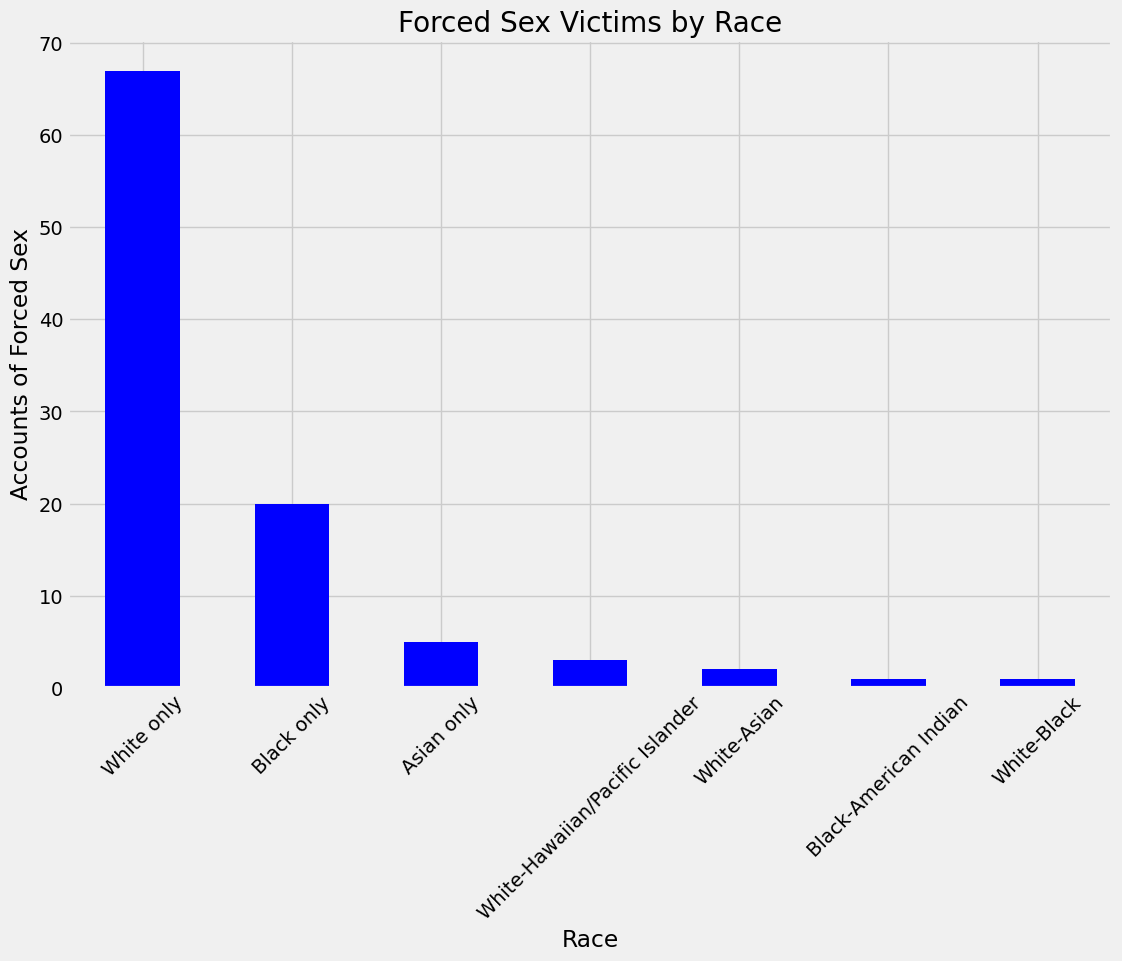

In [173]:
# Figure 5 (Forced Sex Victims by Race)
filtered_crime = crime[(crime['NUM_FORCED_SEX'] != 999) & (crime['NUM_FORCED_SEX'] != 998)]
race_counts = filtered_crime['RACE'].value_counts()

plt.figure(figsize=(12, 8))
race_counts.plot.bar(color='blue')
plt.title('Forced Sex Victims by Race')
plt.xlabel('Race')
plt.ylabel('Accounts of Forced Sex')
plt.xticks(range(len(race_counts)), [race_values[code] for code in race_counts.index], rotation=45)
plt.show()

In [178]:
#Function to add additional column for total thefts or theft attempts (burglary, vehicule theft, stolen stuff, etc.)
def total_thefts(crimes):
    "Creates a new column called for total number of thefts adding up the other number of columns"
    crimes['NUM_TOTAL_THEFTS'] = crimes['NUM_BROKEN_IN'] + crimes['NUM_VEHICLE_THEFT'] + crimes['NUM_STOLEN']
    return crimes

In [179]:
total_thefts(crime)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS,NUM_TOTAL_THEFTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,9,9,11,3,1,2,4,1,1999
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,2,1,1,23,1,3,2,1,2,2000
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,2,1,1,23,1,3,2,1,2,2000
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,9,9,12,3,1,1,4,1,2997
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,1,9,9,26,1,4,2,4,1,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,2020.4,1.998940e+24,3,47,3,5,1,9,2,2,...,1,9,9,23,1,3,2,4,3,2997
8039,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,2,2,9,99,9,9,9,1,2,1001
8040,2020.4,1.998940e+24,2,47,2,1,1,9,2,2,...,2,2,9,99,9,9,9,1,2,1001
8041,2020.4,1.998950e+24,7,57,1,1,1,9,2,2,...,1,9,9,4,3,1,1,4,1,1999


In [134]:
# Random Testing Figure for Gated Community column

gated_community = crime['GATED']
gated_community_values = {
    1: 'Yes',
    2: 'No',
    8: 'Residue',
    -1: 'Invalid until 2004 Q1',
    9: 'Out of Universe',
}
gated_community_values

{1: 'Yes',
 2: 'No',
 8: 'Residue',
 -1: 'Invalid until 2004 Q1',
 9: 'Out of Universe'}

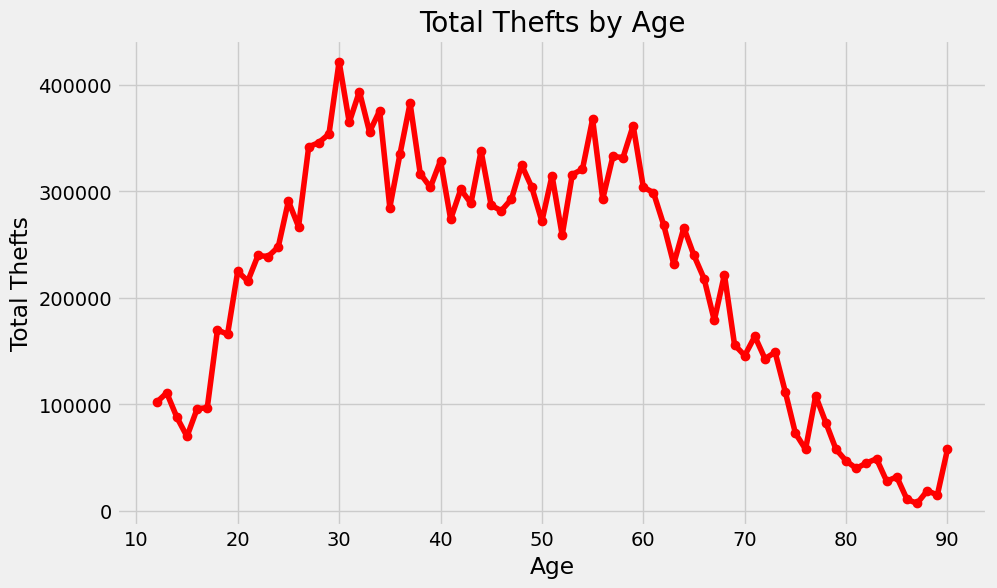

In [176]:
# Figure 6 (Line graph for Total Thefts by Age)
filtered_crime1 = crime.dropna(subset=['AGE', 'NUM_TOTAL_THEFTS'])
thefts_by_community = filtered_crime1.groupby('AGE')['NUM_TOTAL_THEFTS'].sum()

plt.figure(figsize=(10, 6))
thefts_by_community.plot(marker='o', color='red')
plt.title('Total Thefts by Age')
plt.xlabel('Age')
plt.ylabel('Total Thefts')
plt.show()